In [1]:
## imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## creating a random dataset for regression

from sklearn.datasets import make_regression

n = 500 ## no. of samples

X, y = make_regression(n_samples=n, n_features=1, n_informative=1, n_targets=1, noise=100, random_state=27)

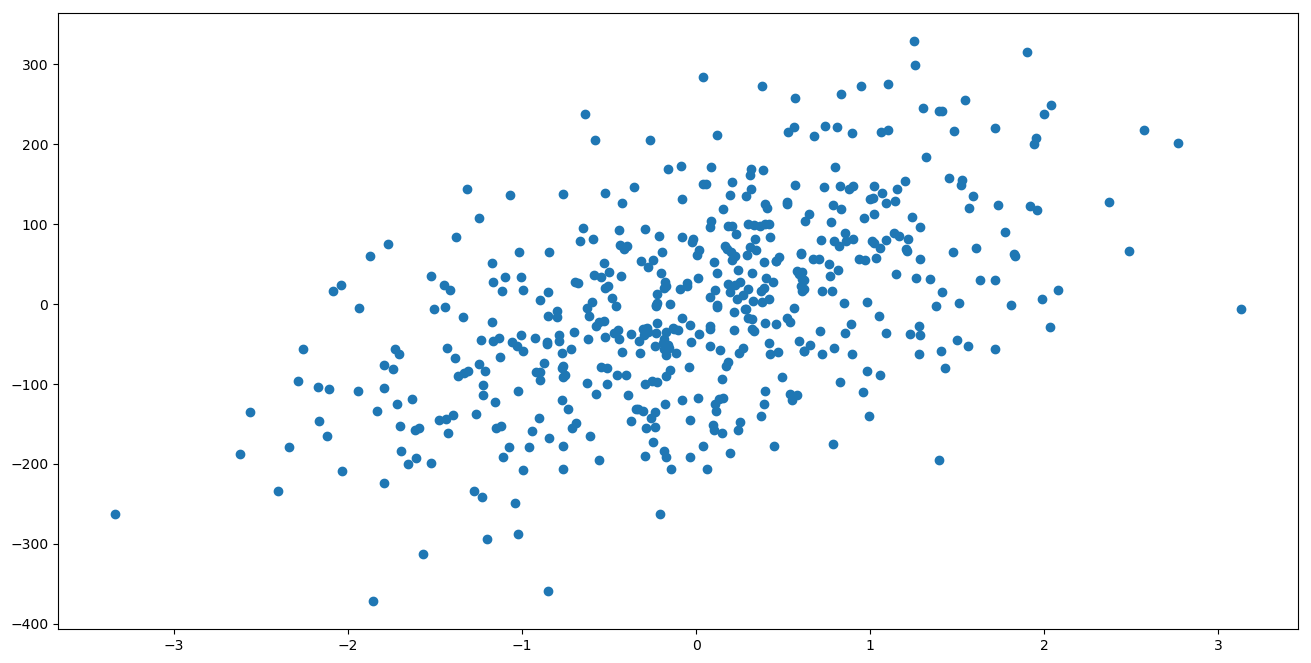

In [3]:
## visualizing the data

%matplotlib inline

fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(X.reshape(-1,1), y)

plt.show()

In [4]:
## using scikit-learn's linear regression as reference to compare our results

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X,y)

LinearRegression()

In [5]:
## getting real intercept

real_intercept = regressor.intercept_
real_intercept

-1.7877424579271104

In [6]:
## getting real coefficient

real_coef = regressor.coef_
real_coef

array([62.36968502])

In [7]:
## finding intercept with gradient descent keeping coef constant

In [8]:
## initializing m=2000 and b=2000 (random extravagant values)
m = 20000
c = 2000

loss_slope = (-2/n)*np.sum(y - (m*X.ravel() + c))
loss_slope

4005.873385100862

In [9]:
## learning rate and step size

L = 0.001 ## experiment in [0.001, 0.1]

step_size = L*loss_slope
step_size

4.005873385100862

In [10]:
## updating c

c = c - step_size
c

1995.9941266148992

In [11]:
## iteration two on updating c

loss_slope = (-2/n)*np.sum(y - (m*X.ravel() + c))

step_size = L*loss_slope

c = c - step_size
c

1991.9962649765685

In [12]:
## iteration three on updating c

loss_slope = (-2/n)*np.sum(y - (m*X.ravel() + c))

step_size = L*loss_slope

c = c - step_size
c

1988.0063990615145

In [13]:
## iterating until we get the right value for c

c_slope_list = list() ## to store value of slope for each epoch
c_list = list() ## to calculate the value of c for each epoch

while np.absolute(loss_slope) >= 10**(-10):
    
    ## check slope
    loss_slope = (-2/n)*np.sum(y - (m*X.ravel() + c))
    
    ## calculate step size
    step_size = L*loss_slope
    
    ## update c
    c = c - step_size
    
    ## append
    c_slope_list.append(loss_slope)
    c_list.append(c)

In [14]:
## check slope
loss_slope

9.97824827209115e-11

In [15]:
## check c value
c

-2.93669255038116

In [16]:
## check ideal answer
real_intercept

-1.7877424579271104

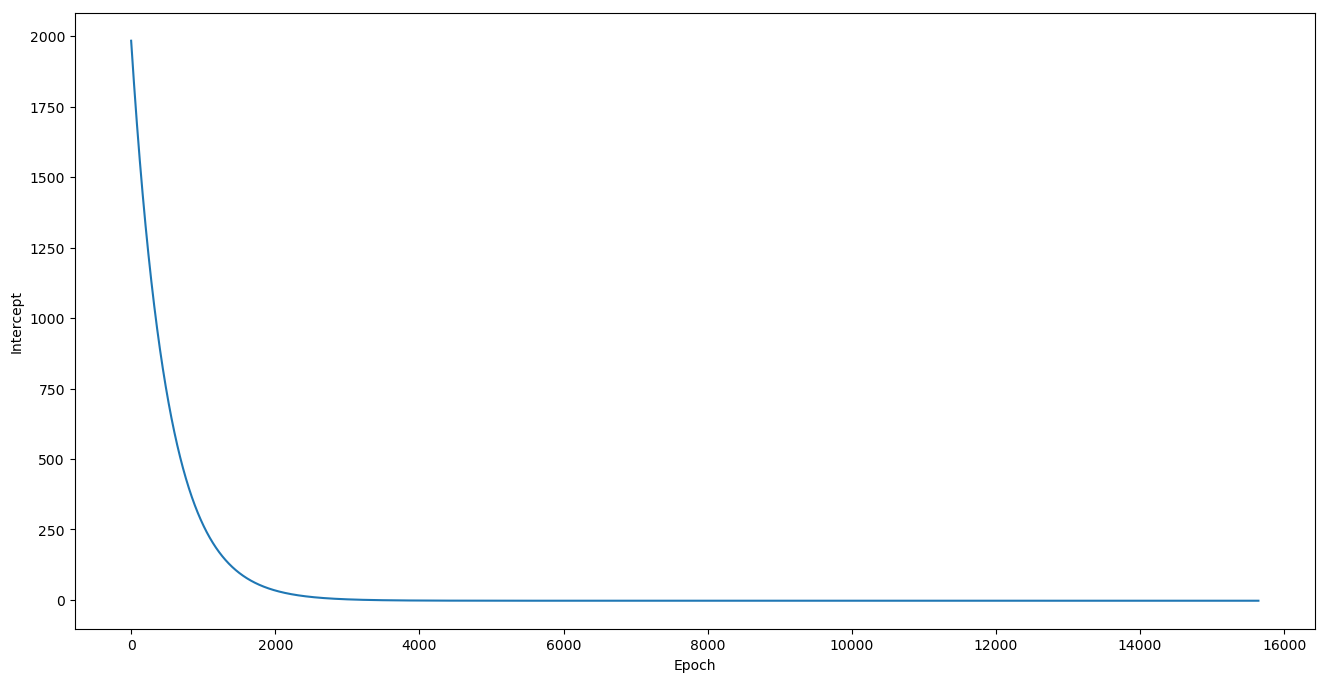

In [17]:
## plotting value of c over epochs

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(c_list)
ax.set_xlabel('Epoch')
ax.set_ylabel('Intercept')

plt.show()

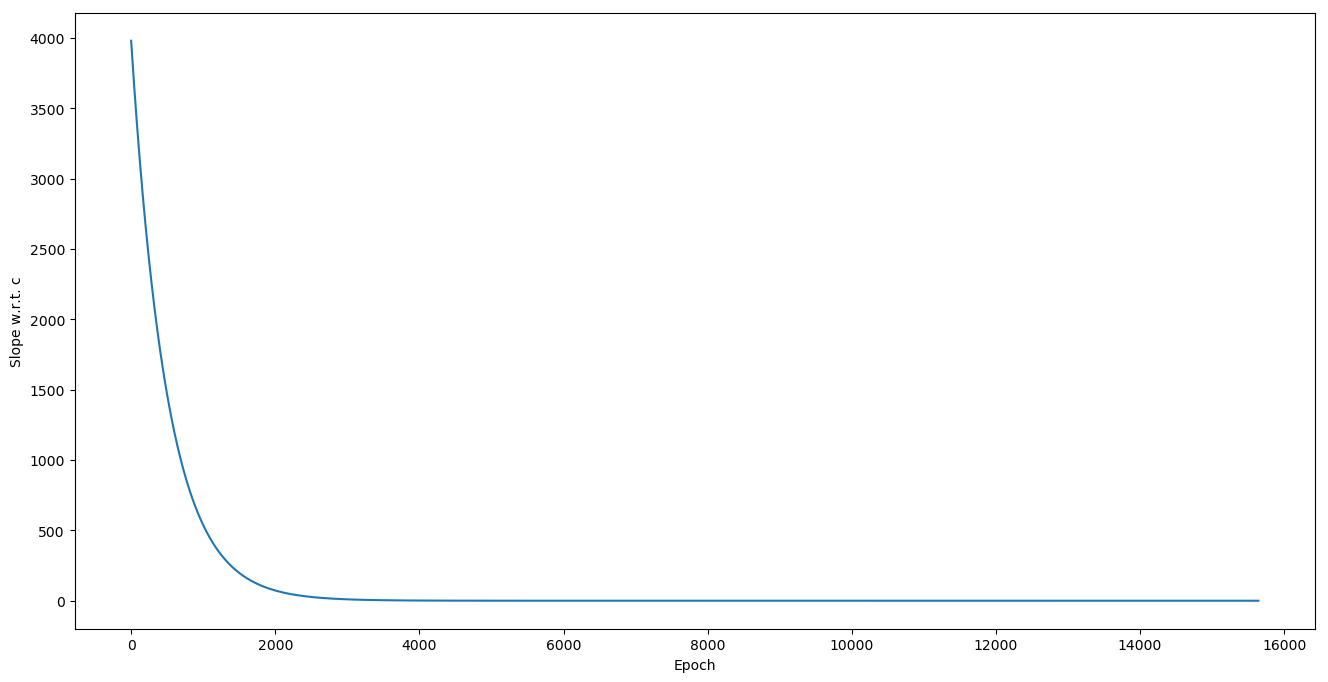

In [18]:
## plotting slope of loss function w.r.t. c over epochs

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(c_slope_list)
ax.set_xlabel('Epoch')
ax.set_ylabel('Slope w.r.t. c')

plt.show()

In [19]:
## total iterations
len(c_list)

15644

In [20]:
## optimizing m keeping c constant

In [21]:
## initializing m=200 and c=c (random extravagant values)
m = 200
c = c
L = 0.01

loss_slope = (-2/n)*np.sum(X.ravel()*(y - (m*X.ravel() + c)))

m_slope_list = list() ## to store values of slope w.r.t. m over the epochs
m_list = list() ## to store values of m over the epochs

while np.absolute(loss_slope) >= 10**(-10):
    
    ## check slope
    loss_slope = (-2/n)*np.sum(X.ravel()*(y - (m*X.ravel() + c)))
    
    ## calculate step size
    step_size = L*loss_slope
    
    ## update c
    m = m - step_size
    
    ## append
    m_slope_list.append(loss_slope)
    m_list.append(m)

In [22]:
## checking value of m
m

62.37035787864467

In [23]:
## checking ideal slope value
real_coef

array([62.36968502])

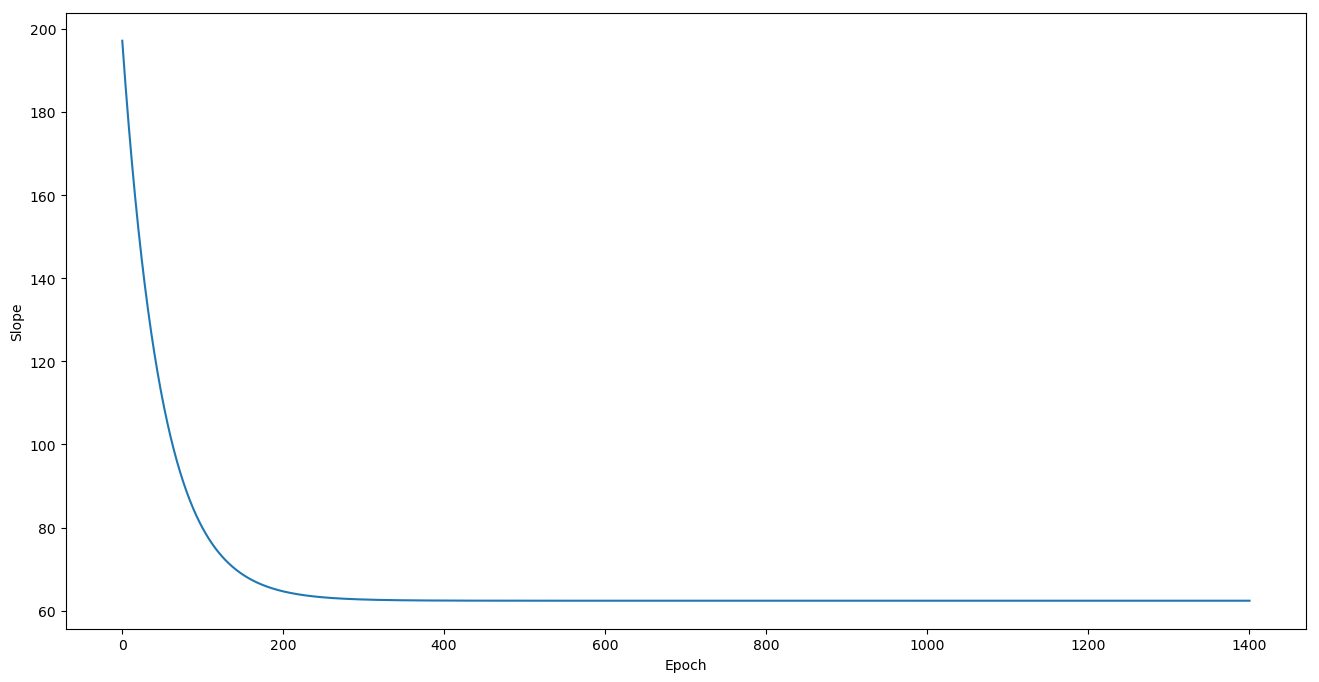

In [24]:
## plotting value of m over epochs

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(m_list)
ax.set_xlabel('Epoch')
ax.set_ylabel('Slope')

plt.show()

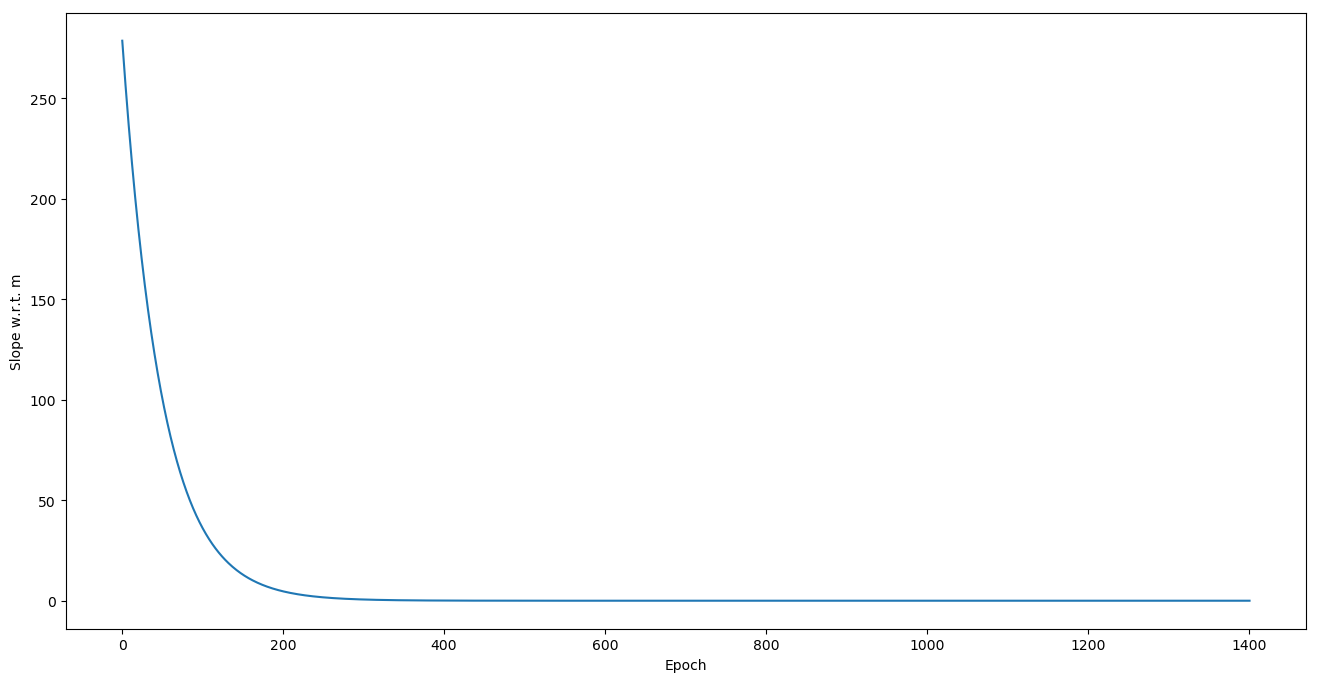

In [25]:
## plotting slope of loss function w.r.t. m over epochs

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(m_slope_list)
ax.set_xlabel('Epoch')
ax.set_ylabel('Slope w.r.t. m')

plt.show()

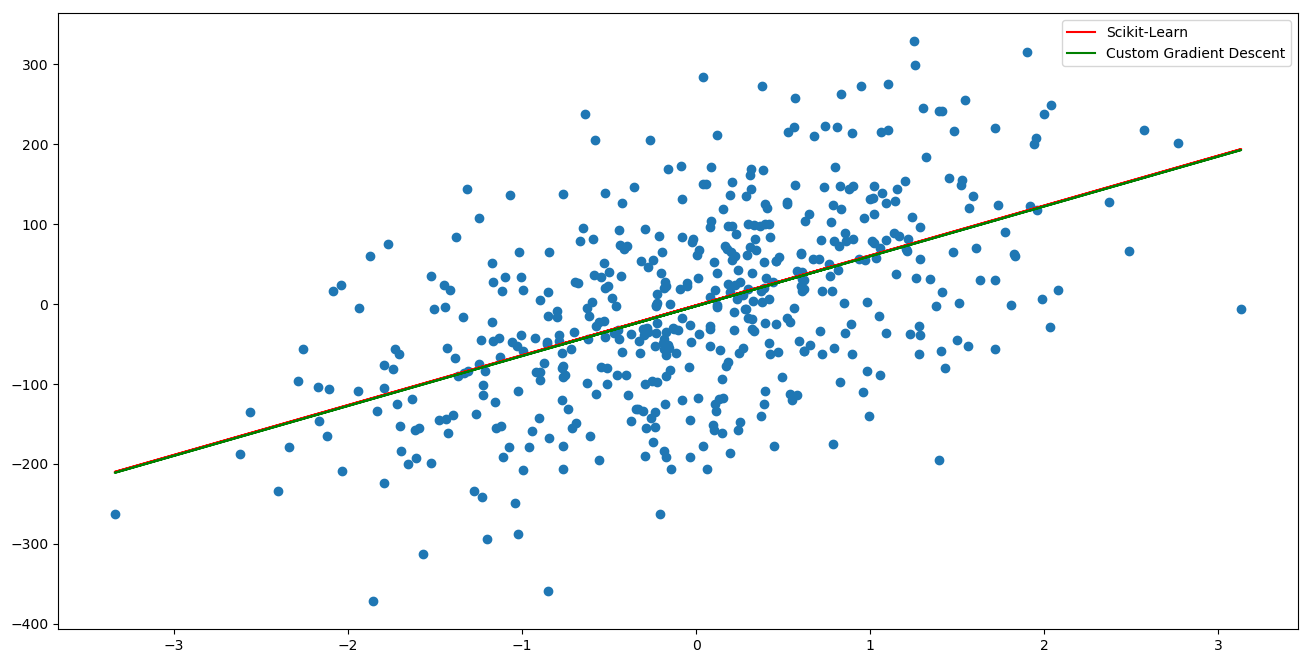

In [26]:
## plotting our custom linear regression alongside scikit-learn's

fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(X,y)
ax.plot(X, regressor.predict(X), color='red')
ax.plot(X, m*X + c, color='green')
ax.legend(['Scikit-Learn', 'Custom Gradient Descent'])

plt.show()

In [28]:
## our line intersects almost perfectly with the results of scikit-learn's linear regression